In [425]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [288]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [289]:
# Read city_data.csv and store it in a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [290]:
# Read ride_data.csv and store it in a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [291]:
# Inspect city_data_df

In [292]:
# Get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [293]:
# Get the columns and rows that are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [294]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [295]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [296]:
# Get the number of data points from Urban cities
sum(city_data_df["type"] == "Urban")

66

In [297]:
# Get the number of data points for each type of city
city_data_df.groupby(["type"]).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [298]:
# Inspect ride_data_df

In [299]:
# Get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [300]:
# Get the columns and rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [301]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [302]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                         on=["city", "city"], how="left")
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [303]:
# Create the Urban, Suburban, and Rural city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [304]:
# Get the urban, suburban, and rural ride counts
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()
suburban_ride_count.head()
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [305]:
# Get the average fare in urban, suburban, and rural cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()
suburban_avg_fare.head()
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [306]:
# Get the total number of drivers in urban, suburban, and rural cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()
suburban_driver_count.head()
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

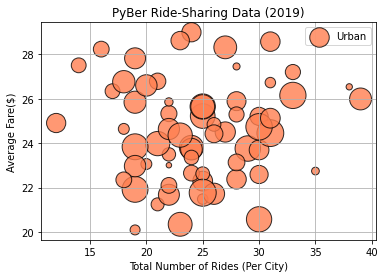

In [307]:
# Create a scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", 
            s=10*urban_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Urban")

# Add a title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Add the legend and grid
plt.legend()
plt.grid(True)

plt.show()

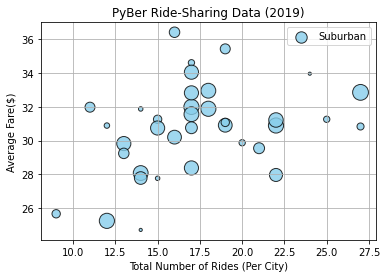

In [308]:
# Create a scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", 
            s=10*suburban_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Suburban")

# Add a title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Add the legend and grid
plt.legend()
plt.grid(True)

plt.show()

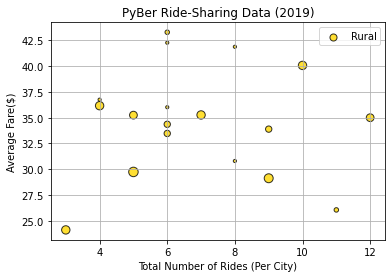

In [309]:
# Create a scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", 
            s=10*rural_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Rural")

# Add a title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

# Add the legend and grid
plt.legend()
plt.grid(True)

plt.show()

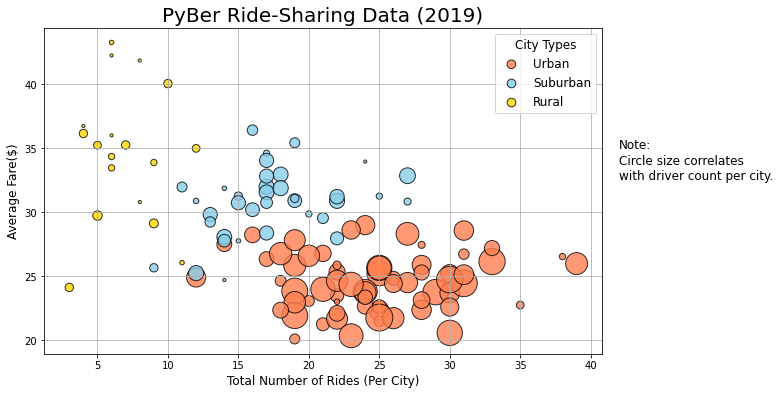

In [397]:
# Create a scatter plot for urban, suburban, and rural cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", 
            s=10*urban_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", 
            s=10*suburban_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", 
            s=10*rural_driver_count, edgecolor='k', linewidths=1, 
            alpha=0.8, label="Rural")

# Add a title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare($)", fontsize=12)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75, 75, 75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add a grid
plt.grid(True)

# Incorporate a text label about circle size
plt.text(42, 35, "Note:", fontsize="12")
plt.text(42, 32.6, "Circle size correlates \nwith driver count per city.", fontsize="12")


# Save the figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight")

plt.show()


In [311]:
# Get summary statistics
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [312]:
# Get summary statistics
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [313]:
# Get the mean ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [314]:
# Get the median ride count for each city
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)


(24.0, 17.0, 6.0)

In [315]:
# Get the mode ride count for each city
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)


(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [316]:
# Get the measures of central tendency for the ride count of urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean ride count for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median ride count for urban trips is {median_urban_ride_count:.1f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode ride count for urban trips is {mode_urban_ride_count[0][0]} and it appears {mode_urban_ride_count[1][0]} times.")


The mean ride count for urban trips is 24.62.
The median ride count for urban trips is 24.0.
The mode ride count for urban trips is 22 and it appears 7 times.


In [317]:
# Get the amount of times that the median ride count appears in suburban cities
suburban_median_ride_count = np.median(suburban_ride_count)
suburban_ride_count[suburban_ride_count == suburban_median_ride_count].count()


7

In [318]:
# Get the mode ride count in rural cities and how many times it appears
rural_mode_ride_count = sts.mode(rural_ride_count)[0][0]
rural_ride_count[rural_ride_count == rural_mode_ride_count].count()


5

In [319]:
# Get the fares for urban, suburban, and rural cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()
suburban_fares.head()
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [320]:
# Calculate the measures of central tendency for average fares in urban cities
mean_urban_fares = urban_fares.mean()
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")

median_urban_fares = urban_fares.median()
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares = urban_fares.mode()[0]
print(f"The mode fare price for urban trips is ${mode_urban_fares:.2f}")


The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $22.86


In [321]:
# Calculate the measures of central tendency for average fares in suburban cities
mean_suburban_fares = suburban_fares.mean()
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares = suburban_fares.median()
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}")

mode_suburban_fares = suburban_fares.mode()[0]
print(f"The mode fare price for suburban trips is ${mode_suburban_fares:.2f}")


The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is $17.99


In [322]:
# Calculate the measures of central tendency for average fares in rural cities
mean_rural_fares = rural_fares.mean()
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")

median_rural_fares = rural_fares.median()
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}")

mode_rural_fares = rural_fares.mode()[0]
print(f"The mode fare price for rural trips is ${mode_rural_fares:.2f}")


The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is $37.05


In [323]:
# Get the driver count data from urban, suburban, and rural cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

urban_drivers.head()
suburban_drivers.head()
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [324]:
# Calculate the measures of central tendency for driver counts in urban cities
mean_urban_driver_count = urban_drivers.mean()
print(f"The mean driver count for urban trips is {mean_urban_driver_count:.0f}.")

median_urban_driver_count = urban_drivers.median()
print(f"The median driver count for urban trips is {median_urban_driver_count:.0f}.")

mode_urban_driver_count = urban_drivers.mode()[0]
print(f"The mode driver count for urban trips is {mode_urban_driver_count}.")


The mean driver count for urban trips is 37.
The median driver count for urban trips is 37.
The mode driver count for urban trips is 39.


In [325]:
# Calculate the measures of central tendency for driver counts in suburban cities
mean_suburban_driver_count = suburban_drivers.mean()
print(f"The mean driver count for suburban trips is {mean_suburban_driver_count:.0f}.")

median_suburban_driver_count = suburban_drivers.median()
print(f"The median driver count for suburban trips is {median_suburban_driver_count:.0f}.")

mode_suburban_driver_count = suburban_drivers.mode()[0]
print(f"The mode driver count for suburban trips is {mode_suburban_driver_count}.")


The mean driver count for suburban trips is 14.
The median driver count for suburban trips is 16.
The mode driver count for suburban trips is 20.


In [326]:
# Calculate the measures of central tendency for driver counts in rural cities
mean_rural_driver_count = rural_drivers.mean()
print(f"The mean driver count for rural trips is {mean_rural_driver_count:.0f}.")

median_rural_driver_count = rural_drivers.median()
print(f"The median driver count for rural trips is {median_rural_driver_count:.0f}.")

mode_rural_driver_count = rural_drivers.mode()[0]
print(f"The mode driver count for rural trips is {mode_rural_driver_count}.")


The mean driver count for rural trips is 4.
The median driver count for rural trips is 4.
The mode driver count for rural trips is 1.


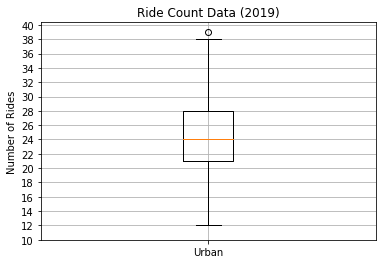

In [398]:
# Create a box-and-whisker plot for urban city ride counts
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add a title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2))
ax.grid()

plt.show()


//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


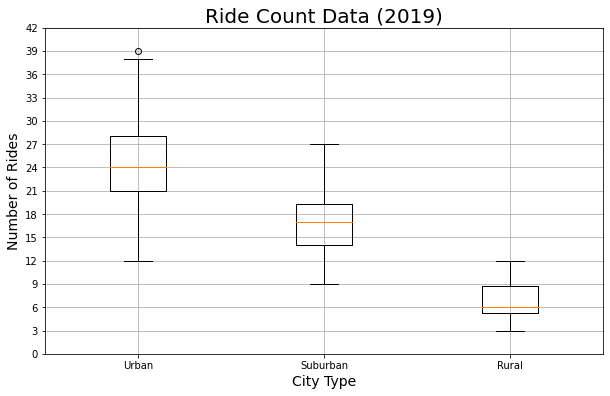

In [404]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Type', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
plt.yticks(np.arange(0, 45, step=3))
plt.grid()

# Save the figure
plt.savefig('analysis/Fig2.png')

plt.show()


In [400]:
# Get the urban city with ride count 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest ride count.')

West Angela has the highest ride count.


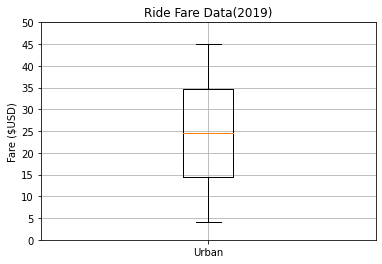

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [401]:
# Create a box-and-whisker plot for urban fare data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label, and grid
plt.title('Ride Fare Data(2019)')
plt.ylabel('Fare ($USD)')
plt.yticks(np.arange(0, 51, step=5))
plt.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()


//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


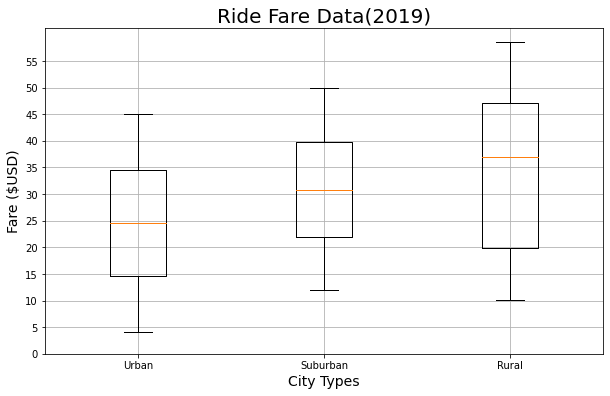

In [409]:
# Add all the fare data box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label, and grid
plt.title('Ride Fare Data(2019)', fontsize=20)
plt.xlabel('City Types', fontsize=14)
plt.ylabel('Fare ($USD)', fontsize=14)
plt.yticks(np.arange(0, 56, step=5))
plt.grid()

# Save the figure
plt.savefig('analysis/Fig3.png')

plt.show()


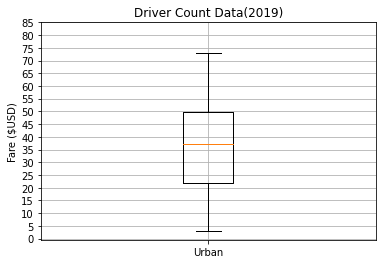

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [403]:
# Create a box-and-whisker plot for urban city driver counts
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, labels=x_labels)

# Add the title, y-axis label, and grid
plt.title('Driver Count Data(2019)')
plt.ylabel('Fare ($USD)')
plt.yticks(np.arange(0, 86, step=5))
plt.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()


//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


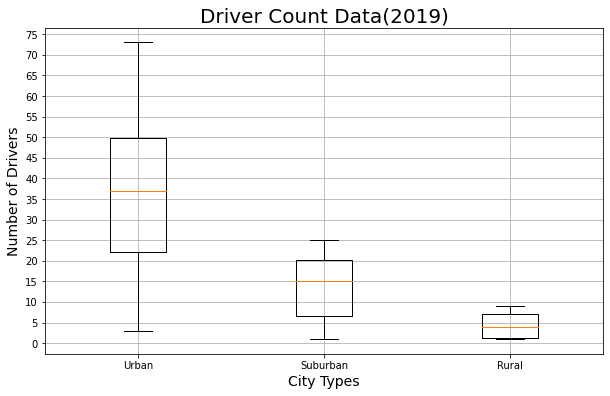

In [410]:
# Add all the driver count data box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label, and grid
plt.title('Driver Count Data(2019)', fontsize=20)
plt.xlabel('City Types', fontsize=14)
plt.ylabel('Number of Drivers', fontsize=14)
plt.yticks(np.arange(0, 76, step=5))
plt.grid()

# Save the figure
plt.savefig('analysis/Fig4.png')

plt.show()



In [416]:
# Get the sum of the ride fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [419]:
# Get the sum of all the ride fares 
total_fares = pyber_data_df["fare"].sum()
total_fares


63538.64

In [420]:
# Calculate the percentage of the total fares for each city type
type_percents = sum_fares_by_type / total_fares * 100
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

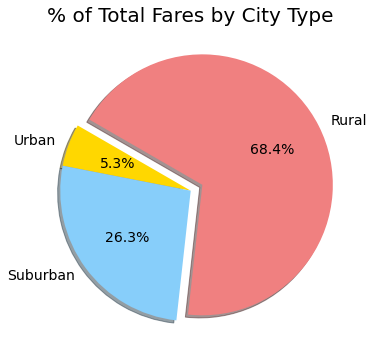

In [439]:
# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=['Urban', 'Suburban', 'Rural'], 
       colors=['gold', 'lightskyblue', 'lightcoral'], explode=[0,0,0.1],
       autopct="%.1f%%", shadow=True, startangle=150)
plt.title('% of Total Fares by City Type', fontsize=20)

# Change the default fontsize from 10 to 14
mpl.rcParams['font.size'] = 14

# Save the figure
plt.savefig('analysis/Fig5.png')

plt.show()


In [437]:
# Calculate the percentage of total rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides = pyber_data_df["ride_id"].count()
ride_percents = sum_rides_by_type / total_rides * 100
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

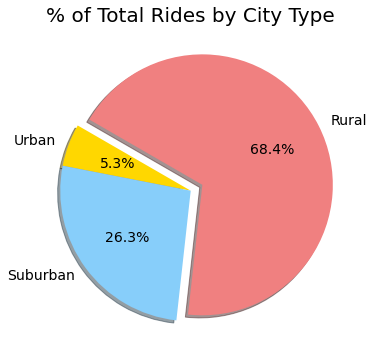

In [441]:
# Build the percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents, labels=['Urban', 'Suburban', 'Rural'], 
       colors=['gold', 'lightskyblue', 'lightcoral'], explode=[0,0,0.1],
       autopct="%.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type', fontsize=20)

# Change the default fontsize from 10 to 14
mpl.rcParams['font.size'] = 14

# Save the figure
plt.savefig('analysis/Fig6.png')

plt.show()
